In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 17:26:10 2020
@author: Rai Kanwar Taimoor
@adapted by Wenhan Yang on Wed May 5 2020
"""

import numpy as np
import pandas as pd
import matplotlib.image as img
from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

def to_lower(arr):
    for i in range(0,len(arr)):
        arr[i] = arr[i].lower()
    return arr
def Result_Table(table_col1, table_col2):
    table = PrettyTable()
    table.add_column("Actual Label", table_col1)
    table.add_column("Predicted Value", table_col2)
    return table
def get_pc(raw_matrix, pca):
    #PCA to get the principle component(a vector)
    pc = pca.fit_transform(raw_matrix)
    explained_variane = pca.explained_variance_ratio_
    return pc, explained_variane
def vectorize_matrix(mat):
    #sraighten the matrix into a column
    col_vector = np.reshape(mat, (len(mat)*len(mat[0])*len(mat[0][0]),1))
    return col_vector
def get_pic_matrix(input_data, filepath):
    #initialize a new array to hold vectorized pics
    input_pics = []
    #two new list to record imgs' idx where they fail to open or process
    idx_exception = []
    #transfrom the corresponding pictures into matrices, then vectors.
    #for train_pics in X_train:
    for i in range(0, len(input_data)):
        try:
            image = img.imread(filepath + input_data[i])
        except:
            #record "throw-away" pics' idx
            idx_exception.append(i)
            continue
        #img_vector, explained_variane = get_pc(image,pca)
        input_pics.append(vectorize_matrix(image))
    return input_pics, idx_exception

In [2]:
# Initialization
my_data = pd.read_csv('facial_expressions-master/data/legend.csv').values
X_data = my_data[:, 1]
y_data = my_data[:, 2]
y_data = to_lower(y_data)

# Spiliting Data 67-33 ratio as said by sir
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.33,random_state=0)

In [3]:
my_path = "facial_expressions-master/resized_images/"
X_train_pics, idx_train_exception = get_pic_matrix(X_train, my_path)
X_test_pics, idx_test_exception = get_pic_matrix(X_test, my_path)
#throw away unprocessable imgs' idx for y data
y_train = np.delete(y_train,idx_train_exception,axis = 0)
y_test = np.delete(y_test,idx_test_exception,axis = 0)
#convert X_data to ndarray
X_train_pics = np.array(X_train_pics)
X_test_pics = np.array(X_test_pics)
X_train_pics, X_test_pics = X_train_pics / 255.0, X_test_pics / 255.0
X_train_pics = X_train_pics.reshape((len(X_train_pics),len(X_train_pics[0])))
X_test_pics = X_test_pics.reshape((len(X_test_pics),len(X_test_pics[0])))

In [4]:
#PCA
# pca = PCA(n_components=10)
# X_train_final, X_train_explained_variane = get_pc(X_train_pics, pca)
# X_test_final, X_test_explained_variane = get_pc(X_test_pics, pca)
#to avoid regularization that is by default these parameters are passed so now there is no regularization
model = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', penalty='l2', C = 2e10, max_iter = 1e7) #to Avoid Regularization !!!
model.fit(X_train_pics, y_train)
predicted = model.predict(X_test_pics)

#to print the table of actual vs predicted value
# noob = predicted.astype(str)
# y = y_test[:, np.newaxis]
# y_p = noob[:, np.newaxis]
# print(Result_Table(y,y_p))
#to print the values suggested by sir 
#didnt print false negative cuz already printed in confussion matrix above it would be redundant otherwise
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test,predicted)
print("Confustion matrix \n",results)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Confustion matrix 
 [[  13    0    2    0   18   32    2    7]
 [   0    0    0    0    2    0    0    0]
 [   2    0   16    0   17   12   19    2]
 [   0    0    1    0    4    3    0    0]
 [  43    1   29    1 1312  375   40   45]
 [  57    0   16    0  344 1709   62  117]
 [   5    0    8    0   30   35    9    4]
 [   4    0    3    0   12   67    4   34]]


In [5]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,predicted)
print('accuracy_score: %.3f' % (accuracy_score*100))

accuracy_score: 68.459


In [6]:
#visualizing confusion matrix in a heat map
import seaborn as sns
import matplotlib.pyplot as plt
def plot_heatmap(y_true,confusion_matrix):
    labels = np.unique(y_true)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix, columns = column, index = indices)
    return sns.heatmap(table, annot=True, fmt='d',linewidths=.5,cmap="YlGnBu")

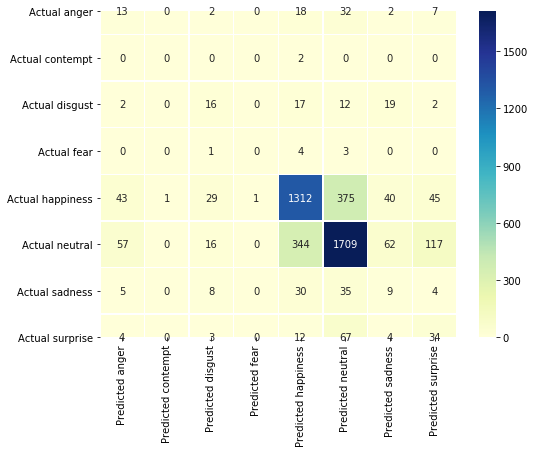

In [10]:
plt.subplots(figsize=(8, 6))
plot_heatmap(y_test,results)
# plt.title("Multinomial Logistic Regression Confusion Matrix Heat Map")

In [8]:
np.unique(predicted)

array(['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral',
       'sadness', 'surprise'], dtype=object)